# Logistic Regression

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('weatherAUS.csv')
df[:5]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Our dataset contains about 10 years of daily weather observations from numerous `Australian` weather stations..

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## Data Preprocessing

In [4]:
# descriptive statistics for the dataset
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [5]:
num_data=[i for i in df.columns if df[i].dtype!='O']
num_data

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [6]:
obj_data=[i for i in df.columns if df[i].dtype=='O']
obj_data

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [7]:
# Cardinality check for Categorical features:- number of unique values in a categorical column
for each_feature in obj_data:
    unique_values = len(df[each_feature].unique())
    print("Cardinality of {} are: {}".format(each_feature, unique_values))

Cardinality of Date are: 3436
Cardinality of Location are: 49
Cardinality of WindGustDir are: 17
Cardinality of WindDir9am are: 17
Cardinality of WindDir3pm are: 17
Cardinality of RainToday are: 3
Cardinality of RainTomorrow are: 3


`Date` column has high cardinality which poses several problems to the model in terms of efficiency and also dimensions of data increase when encoded to numerical data.

In [8]:
# Feature Engineering of Date column to decrease high cardinality
df['Date'][:5]

0    2008-12-01
1    2008-12-02
2    2008-12-03
3    2008-12-04
4    2008-12-05
Name: Date, dtype: object

In [9]:
# convert Obj to Date
import datetime as dt
df['Date']=pd.to_datetime(df['Date'])

df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day

df.drop(['Date'], axis=1, inplace=True)

df[:5]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [10]:
# new obje features
obj_data=[i for i in df.columns if df[i].dtype=='object']
obj_data

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [11]:
# Handle null values
df[obj_data].isna().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [12]:
# impute categorical features null values with the mode 
from sklearn.impute import SimpleImputer
mode_imp=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df[obj_data]=mode_imp.fit_transform(df[obj_data])

In [13]:
# impute numerical features null values with the mode 
df[num_data].isna().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

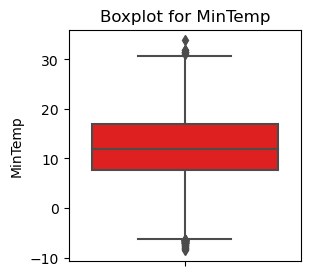

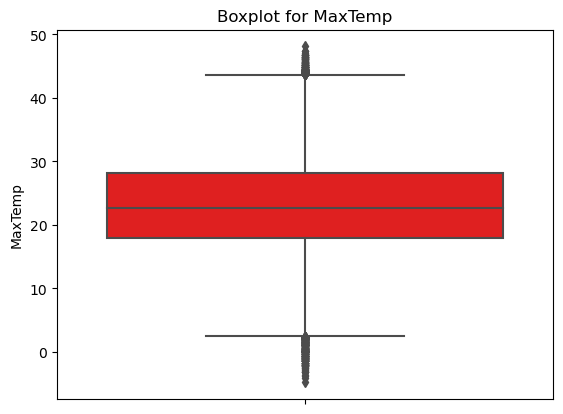

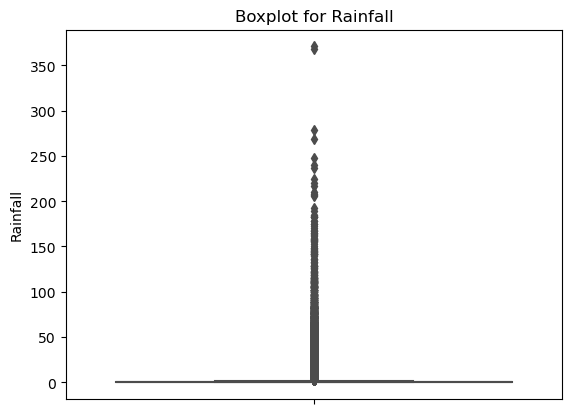

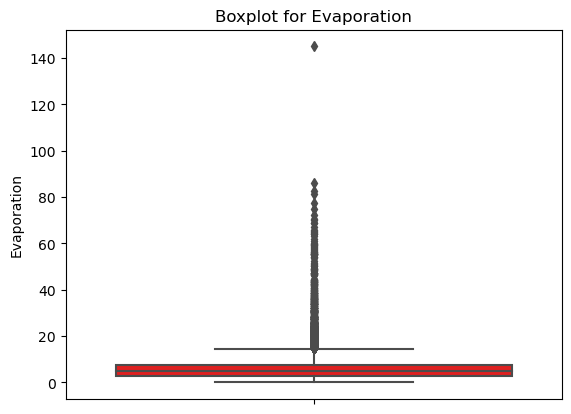

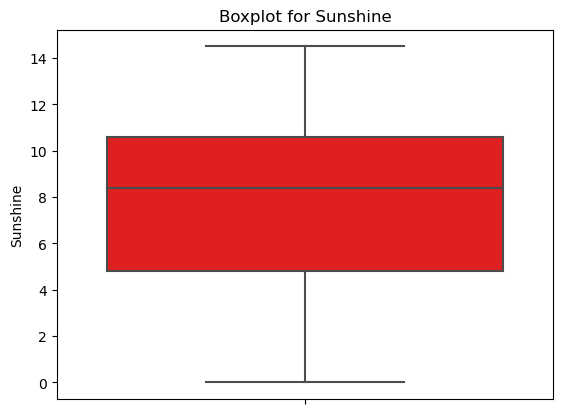

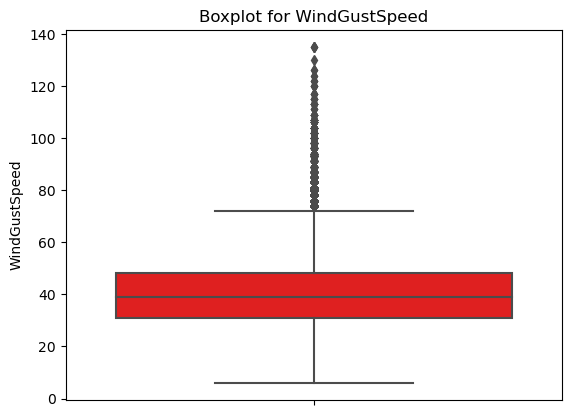

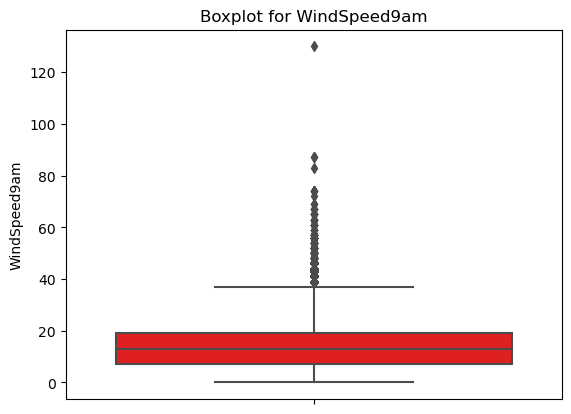

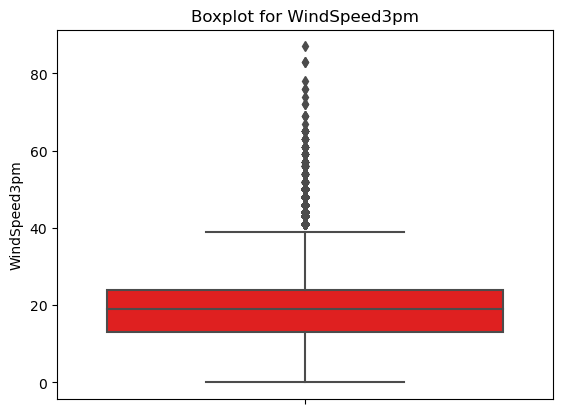

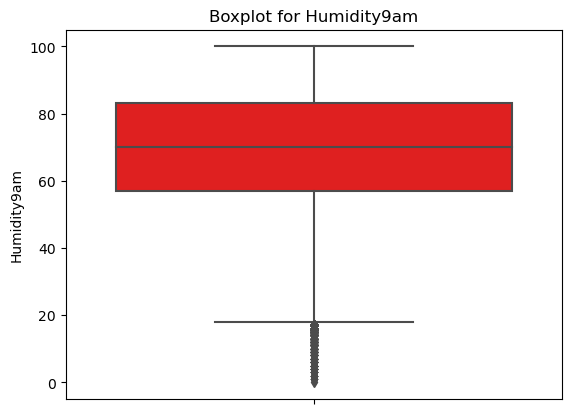

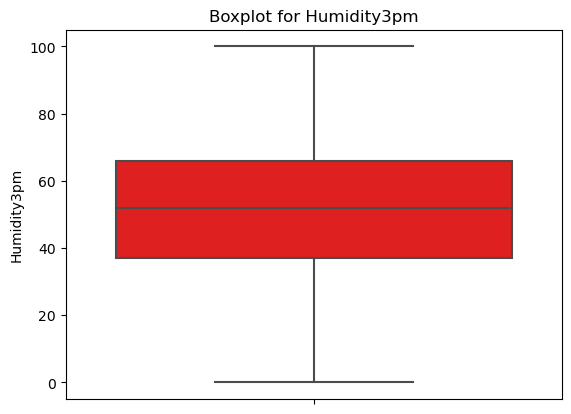

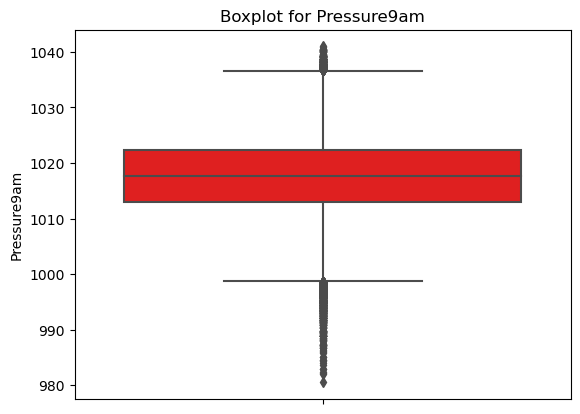

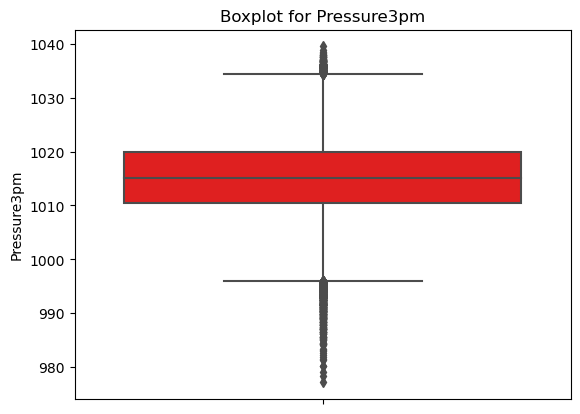

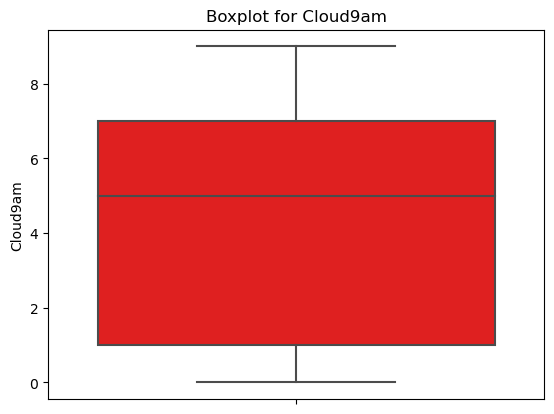

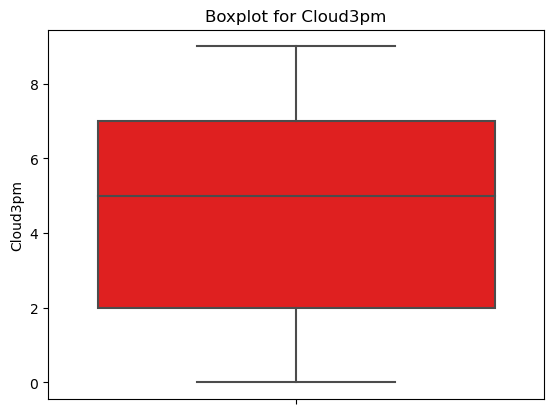

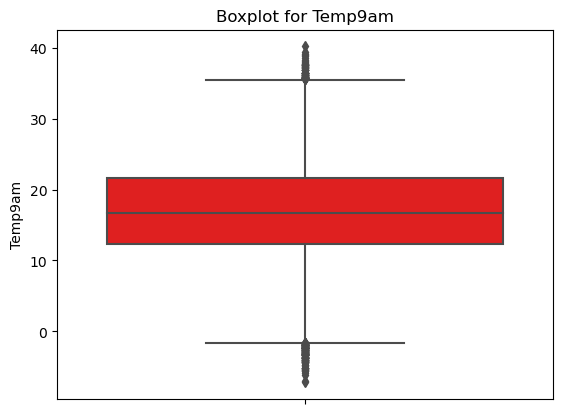

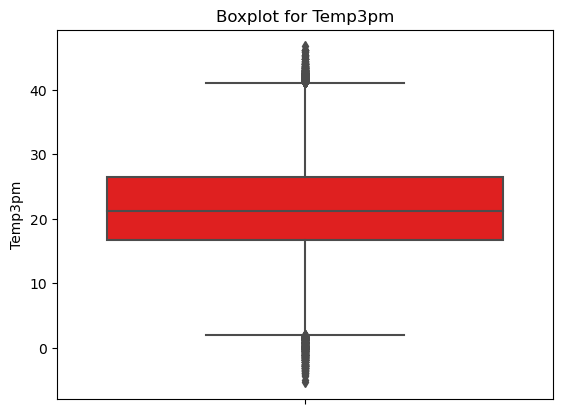

In [14]:
# Check outliers
# Generate box plots dynamically
plt.figure(figsize=(3,3))
palette = sns.color_palette("husl", len(df.columns))  # Generate unique colors for each column

# Loop through columns to create box plots
for column in num_data:
    sns.boxplot(y=df[column], color='red')  
    plt.title(f'Boxplot for {column}')
    plt.ylabel(column)
    plt.show()

In [ ]:
# numerical features have some outliers so we can impute them with median
med_imp=SimpleImputer(missing_values=np.nan, strategy='median')
df[num_data]=med_imp.fit_transform(df[num_data])

df[:5]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,0,13.4,22.9,0.6,5.468232,7.611178,0,44.0,0,0,...,1007.1,8.000000,4.50993,16.9,21.8,0,0,2008,12,1
1,0,7.4,25.1,0.0,5.468232,7.611178,1,44.0,1,1,...,1007.8,4.447461,4.50993,17.2,24.3,0,0,2008,12,2
2,0,12.9,25.7,0.0,5.468232,7.611178,2,46.0,0,1,...,1008.7,4.447461,2.00000,21.0,23.2,0,0,2008,12,3
3,0,9.2,28.0,0.0,5.468232,7.611178,3,24.0,2,2,...,1012.8,4.447461,4.50993,18.1,26.5,0,0,2008,12,4
4,0,17.5,32.3,1.0,5.468232,7.611178,0,41.0,3,3,...,1006.0,7.000000,8.00000,17.8,29.7,0,0,2008,12,5


## EDA

<Axes: xlabel='RainTomorrow'>

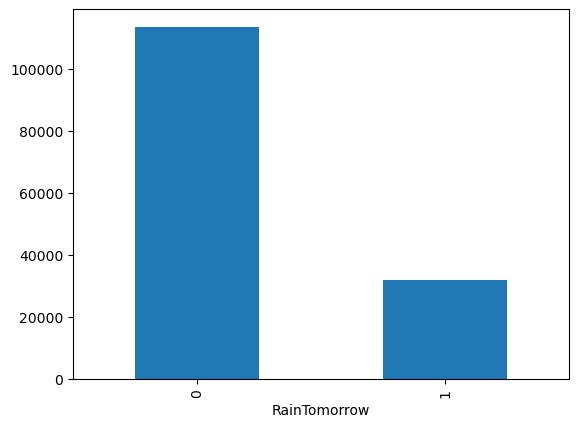

In [27]:
# Univariate

# Target variable
df['RainTomorrow'].value_counts().plot(kind='bar')

Here we can see the target column is not balanced(has more '0' values), since we collected from
the dept of Australia, balancing it might create unrealistic scenarios that do not exist in the real world.

In [28]:
df[['Sunshine', 'Rainfall']]

,Sunshine,Rainfall
0,7.611178,0.6
1,7.611178,0.0
2,7.611178,0.0
3,7.611178,0.0
4,7.611178,1.0
...,...,...
145455,7.611178,0.0
145456,7.611178,0.0
145457,7.611178,0.0
145458,7.611178,0.0


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Sunshine', ylabel='Rainfall'>

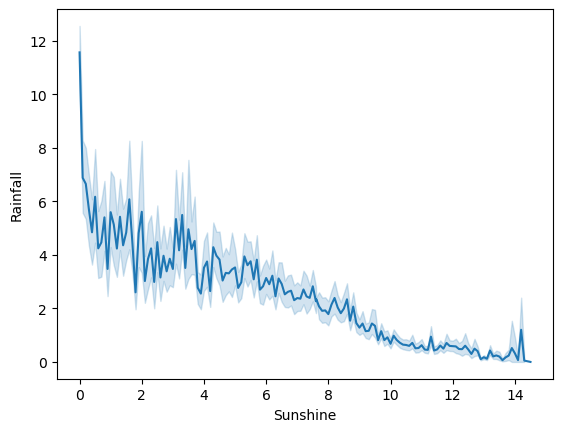

In [29]:
# Bi variate
sns.lineplot(df, x='Sunshine', y='Rainfall')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Sunshine', ylabel='Evaporation'>

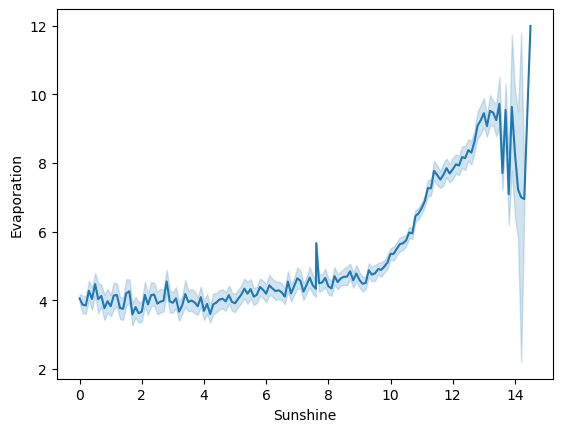

In [30]:
sns.lineplot(df, x='Sunshine', y='Evaporation')

* The Sunshine feature is inversely proportional to the Rainfall feature
* The Sunshine feature is proportional to the Evaporation feature.

In [20]:
# Encoding

# count all the unique values in categorical data
df[obj_data].nunique()

Location        49
WindGustDir     16
WindDir9am      16
WindDir3pm      16
RainToday        2
RainTomorrow     2
dtype: int64

In [21]:
df['RainToday']=df['RainToday'].map({'No':0, 'Yes': 1})
df['RainTomorrow']=df['RainTomorrow'].map({'No':0, 'Yes': 1})

In [22]:
df[['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']][:5]

,Location,WindGustDir,WindDir9am,WindDir3pm
0,Albury,W,W,WNW
1,Albury,WNW,NNW,WSW
2,Albury,WSW,W,WSW
3,Albury,NE,SE,E
4,Albury,W,ENE,NW


In [23]:
# Replace categorical data with index values
# Function to create a mapping dictionary
def encode_idx(col):
    map_dict = {}  # Initialize an empty dictionary
    
    # Get all unique values in the column
    unique_values = list(df[col].unique())
    
    # Create a mapping of unique values to index
    for idx in range(len(unique_values)):
        map_dict[unique_values[idx]] = idx
        
    return map_dict

# Generate the mapping dictionary for columns
loc_mapping=encode_idx('Location')
wind_gust_mapping = encode_idx('WindGustDir')
wind_dir_9_mapping=encode_idx('WindDir9am')
wind_dir_3_mapping=encode_idx('WindDir3pm')

# Map the column using the mapping dictionary
df['Location']=df['Location'].map(loc_mapping)
df['WindGustDir'] = df['WindGustDir'].map(wind_gust_mapping)
df['WindDir9am'] = df['WindDir9am'].map(wind_dir_9_mapping)
df['WindDir3pm'] = df['WindDir3pm'].map(wind_dir_3_mapping)

In [24]:
df[:5]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,0,13.4,22.9,0.6,5.468232,7.611178,0,44.0,0,0,...,1007.1,8.000000,4.50993,16.9,21.8,0,0,2008,12,1
1,0,7.4,25.1,0.0,5.468232,7.611178,1,44.0,1,1,...,1007.8,4.447461,4.50993,17.2,24.3,0,0,2008,12,2
2,0,12.9,25.7,0.0,5.468232,7.611178,2,46.0,0,1,...,1008.7,4.447461,2.00000,21.0,23.2,0,0,2008,12,3
3,0,9.2,28.0,0.0,5.468232,7.611178,3,24.0,2,2,...,1012.8,4.447461,4.50993,18.1,26.5,0,0,2008,12,4
4,0,17.5,32.3,1.0,5.468232,7.611178,0,41.0,3,3,...,1006.0,7.000000,8.00000,17.8,29.7,0,0,2008,12,5


<Axes: >

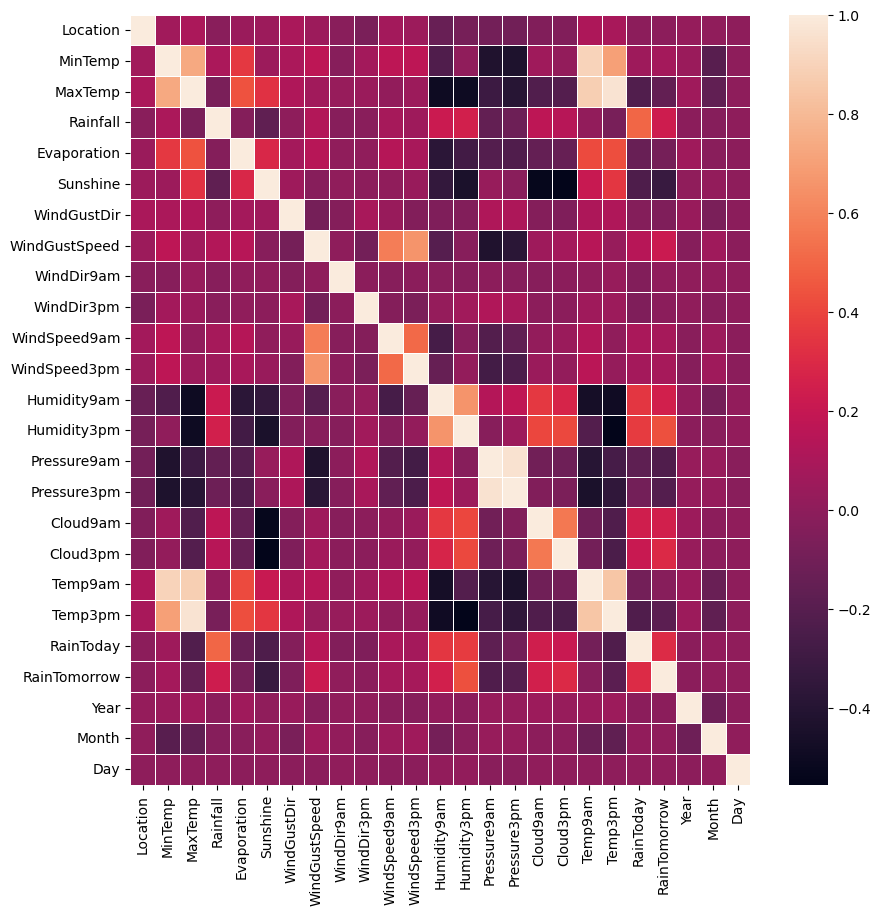

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), linewidths=0.5, annot=False)

In [33]:
# data split
X,y=df.drop(['RainTomorrow'], axis=1), df['RainTomorrow']
X.shape, y.shape

((145460, 24), (145460,))

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

print("Length of Training Data: {}".format(len(X_train)))
print("Length of Testing Data: {}".format(len(X_test)))

Length of Training Data: 116368
Length of Testing Data: 29092


In [35]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_train[:5]

array([[-1.18585745e+00,  1.03785278e+00,  6.93636114e-02,
        -2.57384185e-01, -1.46489170e-01, -1.11098278e-01,
         1.22165431e+00,  9.10072610e-01,  8.07812267e-01,
        -3.37007320e-01,  1.91349855e+00,  1.06828586e+00,
         2.69523672e-01,  1.04738945e+00, -1.55328463e-01,
        -2.02769088e-01,  2.42196104e-01,  1.18988941e+00,
         6.84857034e-01,  7.71707564e-02, -5.30540289e-01,
         4.85718034e-01, -9.91141277e-01, -4.24235410e-01],
       [ 1.77503307e-01, -4.54254104e-01,  1.11705688e-01,
        -2.57384185e-01, -1.21986846e+00,  1.20647074e+00,
        -8.18398224e-01,  6.05313178e-01, -1.46806453e+00,
         1.42010937e+00, -1.18097343e-01,  6.09584192e-01,
         2.69523672e-01,  1.66754249e-01,  9.73397439e-02,
        -9.76871916e-02, -6.40750147e-01,  2.33983182e-01,
        -4.15996869e-01,  2.23205367e-01, -5.30540289e-01,
         1.27361887e+00,  1.05239395e+00, -1.10629435e+00],
       [ 1.18208492e+00, -2.02951892e-01, -1.42346770e

In [37]:
X_test = sc.transform(X_test)
X_test[:3]

array([[ 1.54086407e+00,  1.52475081e+00,  2.28526560e+00,
        -9.16503305e-02,  1.81084954e+00,  1.42606557e+00,
        -6.14392971e-01,  1.29102190e+00, -1.02538451e-01,
         9.80830198e-01,  6.71967729e-01,  1.64166295e+00,
        -1.00633864e+00, -1.25204691e+00, -1.35921815e+00,
        -1.67391563e+00, -1.08222327e+00,  7.11936295e-01,
         1.98727574e+00,  2.00482761e+00,  1.88487099e+00,
         4.85718034e-01,  1.63626116e+00, -1.44732382e+00],
       [-8.27078305e-01,  1.30486138e+00,  2.01709912e+00,
        -2.81060450e-01,  1.17944996e+00,  2.91492254e-01,
        -1.22640873e+00,  1.44340161e+00, -1.01288917e+00,
         9.80830198e-01,  3.33368412e-01,  1.50882523e-01,
        -1.16582143e+00, -1.44774362e+00, -7.05253383e-01,
        -1.31363485e+00, -1.99277021e-01,  1.18988941e+00,
         1.59965112e+00,  2.04863800e+00, -5.30540289e-01,
         8.79668451e-01, -1.57500848e+00, -8.78941370e-01],
       [ 1.25384075e+00, -1.11392241e+00, -8.48048041e

In [38]:
# Model training
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(solver='liblinear', random_state=0)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [40]:
# Model testing
y_pred=log_reg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
# Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))

Accuracy Score: 0.8439433521242954


In [42]:
print("Train Data Score: {}".format(log_reg.score(X_train, y_train)))
print("Test Data Score: {}".format(log_reg.score(X_test, y_test)))

Train Data Score: 0.8433847793207755
Test Data Score: 0.8439433521242954


The accuracy score of training and testing data is comparable and almost equal. So, there is no question of underfitting and overfitting.

In [43]:
# confusion matrix: to summarize the performance of the classification problem
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[21551,  1175],
       [ 3365,  3001]], dtype=int64)

In [52]:
from sklearn.metrics import classification_report
# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)  # Output as a dictionary

# Convert the dictionary to a DataFrame for better formatting
report_df = pd.DataFrame(report).transpose()

print(report_df.round(2))

              precision  recall  f1-score   support
0                  0.86    0.95      0.90  22726.00
1                  0.72    0.47      0.57   6366.00
accuracy           0.84    0.84      0.84      0.84
macro avg          0.79    0.71      0.74  29092.00
weighted avg       0.83    0.84      0.83  29092.00


**Precision:** Measures how many of the predicted values for a class were correct
* For `0` 86% of predictions are correct(model is saying 86% it is true)
* For `1` 72% of predictions are correct

**Recall** Measures how many actual values of a class were correctly predicted.
* For `0` 95%: the model correctly found(
* For `1` 47% of predictions are correct

**Accuracy** Overall correctness of the model
* The model made correct predictions for 84%